In [3]:
!pip install librosa

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------------------------ --------- 0.8/1.0 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 4.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

In [17]:
# noise added music
y, sr = librosa.load(librosa.example('trumpet'))
import numpy as np

# Add white noise
noisy_y = y + 0.02 * np.random.randn(len(y))
import soundfile as sf
sf.write("noisy.wav", noisy_y, sr)


In [19]:
def spectral_subtraction(y, sr, noise_frames=10):
    """
    Simple spectral subtraction algorithm.
    noise_frames: number of initial frames assumed to be noise.
    """
    # Short-time Fourier transform (STFT)
    stft = librosa.stft(y)
    magnitude, phase = np.abs(stft), np.angle(stft)

    # Estimate noise magnitude spectrum (average of first few frames)
    noise_mag = np.mean(magnitude[:, :noise_frames], axis=1, keepdims=True)

    # Subtract noise spectrum (floor at 0 to avoid negatives)
    magnitude_denoised = np.maximum(magnitude - noise_mag, 0.0)

    # Reconstruct signal
    stft_denoised = magnitude_denoised * np.exp(1j * phase)
    y_denoised = librosa.istft(stft_denoised)

    return y_denoised

Enter path of noisy audio file (e.g., noisy.wav):  noisy.wav


✅ Denoised audio saved as denoised_output.wav


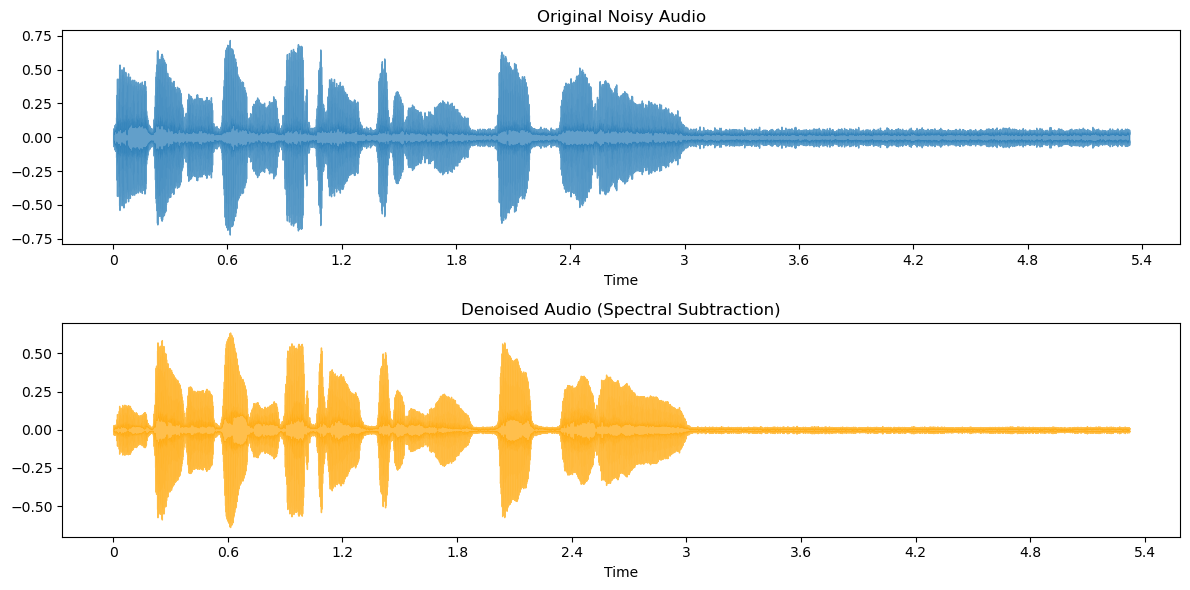

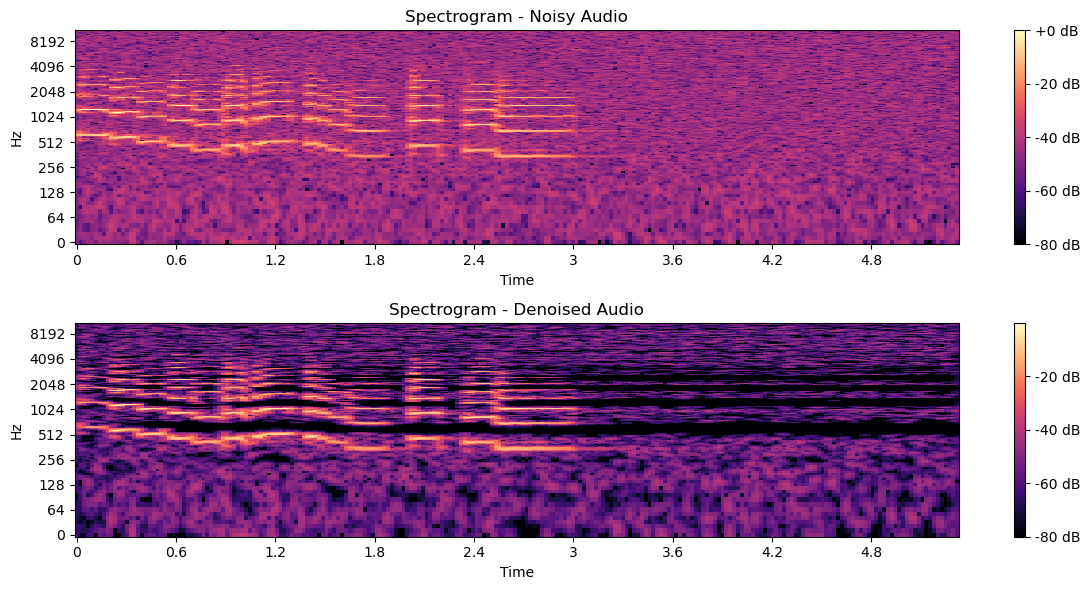

In [21]:
if __name__ == "__main__":
    filepath = input("Enter path of noisy audio file (e.g., noisy.wav): ")

    # Load audio
    y, sr = librosa.load(filepath, sr=None)

    # Apply spectral subtraction
    y_denoised = spectral_subtraction(y, sr)

    # Save result
    sf.write("denoised_output.wav", y_denoised, sr)
    print("✅ Denoised audio saved as denoised_output.wav")

    # Plot original vs denoised waveform
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr, alpha=0.7)
    plt.title("Original Noisy Audio")

    plt.subplot(2, 1, 2)
    librosa.display.waveshow(y_denoised, sr=sr, alpha=0.7, color='orange')
    plt.title("Denoised Audio (Spectral Subtraction)")

    plt.tight_layout()
    plt.show()

    # Plot spectrograms
    D_noisy = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    D_clean = librosa.amplitude_to_db(np.abs(librosa.stft(y_denoised)), ref=np.max)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(D_noisy, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram - Noisy Audio")

    plt.subplot(2, 1, 2)
    librosa.display.specshow(D_clean, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram - Denoised Audio")

    plt.tight_layout()
    plt.show()

## The speech components became more prominent, especially in the low–mid frequency bands where human voice energy is concentrated.
## ⚠️ However, some musical noise artifacts (distorted or “robotic” tones) may still remain, which is a common limitation of simple spectral subtraction.
## ⚠️ More advanced techniques (like Wiener filtering, RNNoise, or deep learning–based denoising) can provide smoother and more natural results.